# Exercise 06.1 - Image Classfication with a Convolutional Neural Network

## Setup DevCube GPU

Before you can start, you have to find a GPU on the system that is not heavily used by other users. Otherwise you cannot initialize your neural network.


**Hint:** the command is **nvidia-smi**, just in case it is displayed above in two lines because of a line break.

As a result you get a summary of the GPUs available in the system, their current memory usage (in MiB for megabytes), and their current utilization (in %). There should be six or eight GPUs listed and these are numbered 0 to n-1 (n being the number of GPUs). The GPU numbers (ids) are quite at the beginning of each GPU section and their numbers increase from top to bottom by 1.

Find a GPU where the memory usage is low. For this purpose look at the memory usage, which looks something like '365MiB / 16125MiB'. The first value is the already used up memory and the second value is the total memory of the GPU. Look for a GPU where there is a large difference between the first and the second value.

**Remember the GPU id and write it in the next line instead of the character X.**

In [1]:

# Change X to the GPU number you want to use,
# otherwise you will get a Python error
# e.g. USE_GPU = 4
USE_GPU = 4 # YOUR_CHOICE

In [2]:
# !nvidia-smi

### Choose one GPU

**The following code is very important and must always be executed before using TensorFlow in the exercises, so that only one GPU is used and that it is set in a way that not all its memory is used at once. Otherwise, the other students will not be able to work with this GPU.**

The following program code imports the TensorFlow library for Deep Learning and outputs the version of the library.

Then, TensorFlow is configured to only see the one GPU whose number you wrote in the above cell (USE_GPU = X) instead of the X.

Finally, the GPU is set so that it does not immediately reserve all memory, but only uses more memory when needed. 

(The comments within the code cell explains a bit of what is happening if you are interested to better understand it. See also the documentation of TensorFlow for an explanation of the used methods.)

In [3]:
# Import TensorFlow 
import tensorflow as tf

# Print the installed TensorFlow version
print(f'TensorFlow version: {tf.__version__}\n')

# Get all GPU devices on this server
gpu_devices = tf.config.list_physical_devices('GPU')

# Print the name and the type of all GPU devices
print('Available GPU Devices:')
for gpu in gpu_devices:
    print(' ', gpu.name, gpu.device_type)
    
# Set only the GPU specified as USE_GPU to be visible
# tf.config.set_visible_devices(gpu_devices[USE_GPU], 'GPU')

# Get all visible GPU  devices on this server
visible_devices = tf.config.get_visible_devices('GPU')

# Print the name and the type of all visible GPU devices
print('\nVisible GPU Devices:')
for gpu in visible_devices:
    print(' ', gpu.name, gpu.device_type)
    
# Set the visible device(s) to not allocate all available memory at once,
# but rather let the memory grow whenever needed
for gpu in visible_devices:
    tf.config.experimental.set_memory_growth(gpu, True)

TensorFlow version: 2.3.0

Available GPU Devices:
  /physical_device:GPU:0 GPU
  /physical_device:GPU:1 GPU
  /physical_device:GPU:2 GPU
  /physical_device:GPU:3 GPU
  /physical_device:GPU:4 GPU
  /physical_device:GPU:5 GPU
  /physical_device:GPU:6 GPU
  /physical_device:GPU:7 GPU

Visible GPU Devices:
  /physical_device:GPU:0 GPU
  /physical_device:GPU:1 GPU
  /physical_device:GPU:2 GPU
  /physical_device:GPU:3 GPU
  /physical_device:GPU:4 GPU
  /physical_device:GPU:5 GPU
  /physical_device:GPU:6 GPU
  /physical_device:GPU:7 GPU


In [4]:
# please run this cell in order to have the plots displayed in the notebook
%matplotlib inline

In [5]:
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Image classification with Convolutional  Neural Networks

In this section perform roof classification in aerial images using Convolutional.
Since the available dataset is of reduced size for the requirements on DL models, your model would benefit from applying the introduced regularization techniques in order to prevent your model from overfitting. 



### Learning Objectives:

+ Build independently a Convolutional Neural network for classification of aerial images



### CNNs basics
* the input to a CNN is a (single) `4 rank tensor (nr_samples_nr, im_height, im_width, nr_channels)`

 
 #### Convolutional layers
 
 A convolutional layer performs the following operations:
 
- Takes an input volume 
- Applies a filter at every position of the input
- Outputs another volume (usually of different size)
<center><img src="images/Convolution_schematic.gif" style="width:500px;height:300px;"></center>
    
 The _main_ parameters are of a [convolutional layer](https://keras.io/layers/convolutional/) in keras are:

1. `filters` - the number of output channels (the number of convolutions you want to generate). Purely arbitrary, but good to start with something in the order of 32
2. `kernel_size` - the shape of the convolutional filter, in this case a 3x3 grid
3. `activation` - the activation function to use -- in this case we'll use relu, which you might recall is the equivalent of returning x when x>0, else returning 0
4. `input_shape`- only for the first layer, the shape of the input data.

#### Pooling layers

A Convolutional layer is commonly followed by a `pooling layer`.
Applying (POOL) layer reduces the height and width of the input. It helps reduce computation costs, as well as helps make feature detectors more invariant to its position in the input. The most common type of pooling layers is `Max-pooling layer`:
* slides an ($f, f$) window over the input and stores the max value of the window in the output.
<center><img src="./images/max_pool1.png" style="width:500px;height:300px;"></center>

- Max-pooling layer: slides an ($f, f$) window over the input and stores the max value of the window in the output
The main parameters of [pool layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) in TensorFlow.keras are:
- `pool_size` - the shape of the pooling filter,specifies the height and width of the fxf window you would compute a max or average over, commonly (2,2)
###### Important observation:
* pooling layers have no parameters for backpropagation to train. 

####  Dataset

For more information about the dataset used in this exercise, please check exercies 5.04 - Roof classification in aerial images. 

We assume that the dataset resides and is used in the coursematerial folder.

## Data organization

In [6]:
data_dir = str(Path.home()) + r'/coursematerial/GIS/dataset_img_building_roofs/'

train_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'validation')
test_dir = os.path.join(data_dir, 'test')

In [7]:
print('Number of training images belonging to flat_roof_class :', len(os.listdir(os.path.join(train_dir,'flat_roof'))))
print('Number of training belonging to hip_roof_class:', len(os.listdir(os.path.join(train_dir,'hip_roof'))))
print('Number of training images belonging to other_roof_types_class:', len(os.listdir(os.path.join(train_dir,'other_roof'))))

Number of training images belonging to flat_roof_class : 108
Number of training belonging to hip_roof_class: 158
Number of training images belonging to other_roof_types_class: 28


### Data Generators Setup 

You'll have one generator for the _training images_, one for the _validation images_ and one for _test images_. Your generators will yield batches of images of size 64x64 and their categorical labels. One feature of the image generator is that we can point it at **a parent directory** (in our example called `train_dir`, `validation_dir` and `validation_dir`respectively) and then the **sub-directories** of that will automatically **generate labels** for you. 
Please notice, your images dataset is already split (no need of split fraction) and stored in different directories. When using _flow_from_directory_method_ please point to the right directory.


In [8]:
# setting some hyperparameters
NR_OF_IMAGES = 294
BATCH_SIZE = 32
STEPS_PER_EPOCH = int(NR_OF_IMAGES/BATCH_SIZE)
IMAGE_WIDTH = 128 
IMAGE_HEIGHT = 128

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Instantiate a _ImageDataGenerator_ object for your training images that:

 * scales the images

 * specify several transformations to be applied on the original images in order to augment the dataset
 
 
 Call _flow_from_directory_ on this object and save the function in a variable _train_generator_.
 * specify the target directory
 * pass in the size of the images 
 * specify the batch size 
 * specify the class_mode 

In [10]:
# All images will be rescaled by 1./255


train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range = 30, width_shift_range = 0.2, 
                                   height_shift_range=0.2, horizontal_flip=True) # create an image generator instance

print("\nData generator for training data:")
train_generator =  train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 64x64
        target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
        batch_size = BATCH_SIZE,
        # Since we use categorical_crossentropy loss, we need categorical labels 
        class_mode='categorical') # we would pass in 'binary' for binary classfication (2 classes)


Data generator for training data:
Found 294 images belonging to 3 classes.


Instantiate a _ImageDataGenerator_ object for your validation images that:

 * scales the images </br>
 
Call _flow_from_directory_ on this object and save the function in a variable _validation_generator_.
 * specify the target directory
 * pass in the size of the images 
 * specify the batch size 
 * specify the class_mode 

In [11]:
validation_datagen = ImageDataGenerator(rescale=1./255)        
print("\nData generator for validation data:")
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
        batch_size= BATCH_SIZE,
        class_mode='categorical')


Data generator for validation data:
Found 72 images belonging to 3 classes.


Instantiate a _ImageDataGenerator_ object for your test images that:

 * scales the images </br>
 
Call _flow_from_directory_ on this object and save the function in a variable _test_generator_.
 * specify the target directory
 * pass in the size of the images 
 * specify the batch size 
 * specify the class_mode 

In [12]:
test_datagen = ImageDataGenerator(rescale=1./255)
print("\nData generator for test data:")
print("\nData generator for test data:")
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
        batch_size=BATCH_SIZE,
        class_mode='categorical')


Data generator for test data:

Data generator for test data:
Found 123 images belonging to 3 classes.


####  Task 01 -Build the Convolutional Neural Network model


1) Instantiate a model object from tf.keras Sequential class

2) Use repeatedly the add method on this object to add a stack convolutional, pooling layers as follows:

* one `conv layer` [tf.keras.layers.Conv2D()](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) - passing the following args: - number of filters: 32, filter_shape: (3,3), activation:'relu', input_shape 
* one `max_pool layer`[tf.keras.layers.MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D), pass the pool_size arg: (2,2) 
* one `conv layer` [tf.keras.layers.Conv2D()](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) - passing the following args: - number of filters: 64, filter_shape: (3,3), activation:'relu'
* one `max_pool layer`[tf.keras.layers.MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D), pass the pool_size arg: (2,2)
* faltten the output of the previous layer using: [tf.keras.layers.Flatten(https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten)] (This will allow to add a fully connected layer)
* one fully connected layer [tf.keras.layers.Dense](tf.keras.layers.Dense), pass as args: 128 output neuron units, activation 'relu'
* output layer:  one fully connected layer [tf.keras.layers.Dense](tf.keras.layers.Dense), pass as args: 10 output neuron units (the number of categories in the dataset, activation 'softmax'

Schematically your model can be represented as below:

<img src ="images/Convolution model .png">

The base model can be improved by increasing the number of layers / filters. After running the base configuration, try to experiment with other network configurations.

In [13]:
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, ReLU, Dropout

In [14]:
input_shape=(128,128,3)

models = tf.keras.Sequential()
models.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
models.add(MaxPool2D(pool_size=(2, 2)))
models.add(Conv2D(64, (3,3), activation='relu'))
models.add(MaxPool2D((2, 2)))
models.add(Flatten())
models.add(Dense(128, activation='relu'))
models.add(Dense(3, activation='softmax'))

In [15]:
models.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               7372928   
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 3

### Task 02: Define callabacks

* define a tf.keras callback [EarlyStopping object](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) that:
        -  will stop the training after no improvement in val_accuracy for a number of 12 Epoch and 
        -  saves the best weights

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

my_callbacks = [
    EarlyStopping(monitor= 'val_loss', min_delta = .0001, patience = 12, restore_best_weights = True)
]

#### TASK 3: Compile the model

You should now compile the model using the `compile` method. Remember that you need to specify an optimizer, a loss function and a metric to judge the performance of your model.

In [17]:
models.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True, label_smoothing=0.1),
  metrics=['accuracy'])

#### TASK 4: Fit the model to the training data

Now you should train the model on the *Building Roofs dataset* by calling the  `fit()` method on the compiled model object.
* Pass in the `train_generator`to the model's `fit` method.
* Pass in `STEPS_PER_EPOCH` defined before to the `steps_per_epoch` argument.
* Pass in the 'validation_generator' to the `validation_data` argument. 
* Run the training for a number of 100 epochs, passed in to the function's `epochs` argument.
* Set the value of the `shuffle` argument to  `True`
* Assign the output of the fit method to a variable 'history'  to be used for plotting the learning curves.
* Pass in you callbacks list to the callbacks arguments
For refreshing the possible arguments of the `fit()`method please read the [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit)

In [18]:
validation_steps = validation_generator.samples // validation_generator.batch_size
history = models.fit(train_generator, epochs=100, verbose='auto', 
                    steps_per_epoch=STEPS_PER_EPOCH, validation_data=validation_generator,
                    shuffle=True, callbacks=my_callbacks,  validation_steps=validation_steps)

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100


#### Plot the learning curves

We will now plot two graphs:
* Epoch vs accuracy
* Epoch vs loss

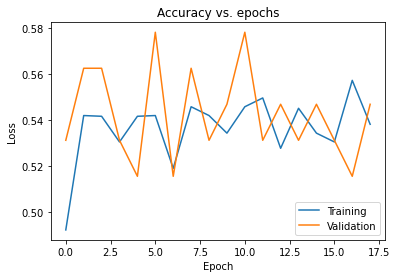

In [19]:
# Run this cell to plot the epoch vs accuracy graph

try:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
except KeyError:
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

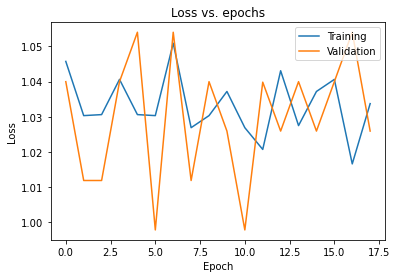

In [20]:
#Run this cell to plot the epoch vs loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

## Predict the class for a single image

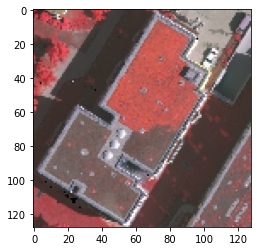

In [21]:
from keras.preprocessing import image
first_batch_of_test_set = test_generator[0]
images, labels = first_batch_of_test_set
img = images[0] #first_image_in_batch

_ = plt.imshow(img)

In [22]:
img = np.expand_dims(img,axis=0)

In [24]:
# Make a prediction on one image
classif_prob = models.predict(img)
print(classif_prob)

[[2.2765336e-09 1.0000000e+00 5.1248569e-21]]


In [25]:
# Get the indices of the element of the highest probability
pred_classes_argmax = np.argmax(classif_prob,axis=-1)

In [26]:
# We have one image, get the index of the predicted class.
predicted_cls = pred_classes_argmax[0]
print("Predicted class:", predicted_cls)

Predicted class: 1


In [27]:
# Get the class label using the Keras data generator
for index,cls in train_generator.class_indices.items():
    if cls == predicted_cls:
        class_label = index
class_label
print(class_label)

hip_roof


In [28]:
# Get example image. The first image of the predicted class folder
example_img_path = os.listdir(os.path.join(train_dir,class_label))[0]
example_img_path

'321.png'

In [ ]:
# Get example image full path
example_img_full_path = os.path.join(train_dir,class_label,example_img_path)
example_img_full_path

In [ ]:
# Show predicted class example
img = image.load_img(example_img_full_path, target_size=(64, 64))
_= plt.imshow(img)

## A closer look at classification scores

In [ ]:
classifications = model.predict(test_generator,2)

print(classifications[0])

In [ ]:
predicted_class = np.argmax(classifications[0])
print('Predicted class:{}'.format(predicted_class))

## Testing Accuracy

In [ ]:
values = model.evaluate(test_generator, steps=len(test_generator))
print("{}:{},{}:{}.".format(model.metrics_names[0],values[0],model.metrics_names[1],values[1]))


### Further practice:

Improve your model:

* Add another Conv (128 filters) + Pool layers
* Increase the number of units of the Dense layer to 256.
* Add an Dropout layer after the fully connected layer.
* Re-train the network.
